In [136]:
#getting and working with data
import pandas as pd
import numpy as np
import scipy as sp
import re
import os
from itertools import groupby
import datetime as dt

from scipy import stats

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.anova import AnovaRM
from statsmodels.graphics.factorplots import interaction_plot

import pingouin as pg
from pingouin import ttest

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':35,
                              'axes.titlesize':50,
                              'axes.labelsize':35})

pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

### Get data

In [2]:
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/reward_learning_tc/processed_data'

file_names = os.listdir(path)
print(len(file_names))

file_paths = []

for file in file_names:
    
    file_path = path + '/' + file
    file_paths.append(file_path)

print(len(file_paths))
file_paths

7
7


['/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/reward_learning_tc/processed_data/.DS_Store',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/reward_learning_tc/processed_data/final_trial_data_g2s.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/reward_learning_tc/processed_data/final_trial_data_g1_ol.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/reward_learning_tc/processed_data/final_trial_data_g1_sl.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/reward_learning_tc/processed_data/final_trial_data_g12.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/reward_learning_tc/processed_data/final_trial_data_g1.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/reward_learning_tc/processed_data/final_trial_data_g2.csv']

In [66]:
data_session = pd.read_csv(file_paths[4])
data_session = pd.DataFrame(data = data_session)
print(data_session.shape)
data_session['task'].value_counts()

(83210, 25)


LPD         36394
LPDE        18473
LPS         12080
LPDFR3R1     4720
LPDFR3R3     2950
LPDRC        2488
LPDRDD       1965
LPDRE        1935
LPDPRR3      1107
LPDPRR1      1098
Name: task, dtype: int64

### LPD

In [11]:
data_session_LPD = data_session[data_session['task'] == 'LPD']
print(data_session_LPD.shape)

(83210, 25)
(36394, 25)


In [12]:
sum_params = ['reinforcement_count', 'HE_count', 'active_lever_count', 'inactive_lever_count']

max_params = ['trial_num']

mean_params = ['reinforcement_latency_1st', 'reinforcement_latency_IRT',
               'HE_latency_1st', 'HE_latency_IRT', 
               'active_lever_latency_1st', 'active_lever_latency_IRT',
               'inactive_lever_latency_1st', 'inactive_lever_latency_IRT',
               'lever_ratio', 'trial_duration']

In [58]:
merge_cols = ['round', 'task', 'part', 'session', 'date', 'cage', 'animal', 'group', 'active_lever']

data_session_LPD_sum = data_session_LPD.groupby(merge_cols)[sum_params].sum().reset_index()
data_session_LPD_mean = data_session_LPD.groupby(merge_cols)[mean_params].mean().reset_index()
data_session_LPD_max = data_session_LPD.groupby(merge_cols)[max_params].max().reset_index()

data_session_LPD_gb = data_session_LPD_sum.merge(data_session_LPD_mean, on=merge_cols).merge(data_session_LPD_max, on=merge_cols)

data_session_LPD_gb['reward_efficiency'] = data_session_LPD_gb['active_lever_count'] / (data_session_LPD_gb['active_lever_count'] + data_session_LPD_gb['inactive_lever_count'])
print(data_session_LPD_gb.shape)
data_session_LPD_gb.tail()

(576, 25)


,round,task,part,session,date,cage,animal,group,active_lever,reinforcement_count,HE_count,active_lever_count,inactive_lever_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_latency_1st,HE_latency_IRT,active_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_1st,inactive_lever_latency_IRT,lever_ratio,trial_duration,trial_num,reward_efficiency
571,r2,LPD,within,8,210405,SA328,1243,5,right,59,1,59,27,2.167288,NaN,10.270000,NaN,2.157288,NaN,0.915714,0.640476,0.911145,2.167288,58,0.686047
572,r2,LPD,within,8,210405,SA328,1244,5,right,58,10,58,20,3.280517,NaN,0.687143,0.726667,3.270517,NaN,1.662000,0.438667,0.935345,3.280517,57,0.743590
573,r2,LPD,within,8,210405,SA330,1248,5,left,52,2,52,11,10.551154,NaN,8.720000,NaN,10.541154,NaN,13.510000,1.371250,0.949359,10.551154,51,0.825397
574,r2,LPD,within,8,210405,SA330,1249,5,left,59,2,59,13,3.012712,NaN,13.945000,NaN,3.002712,NaN,1.844000,0.252143,0.948211,3.012712,58,0.819444
575,r2,LPD,within,8,210405,SA330,1250,5,left,56,3,56,12,5.313929,NaN,0.546667,NaN,5.303929,NaN,5.672500,0.408000,0.952551,5.313929,55,0.823529


In [65]:
data_session_LPD_gb_16 = data_session_LPD_gb[data_session_LPD_gb['session'] <7]
data_session_LPD_gb_16_wi = data_session_LPD_gb_16[data_session_LPD_gb_16['part'] == 'within']
data_session_LPD_gb_16_wi = data_session_LPD_gb_16_wi[data_session_LPD_gb_16_wi['animal'] > 900]
data_session_LPD_gb_16_wi

,round,task,part,session,date,cage,animal,group,active_lever,reinforcement_count,HE_count,active_lever_count,inactive_lever_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_latency_1st,HE_latency_IRT,active_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_1st,inactive_lever_latency_IRT,lever_ratio,trial_duration,trial_num,reward_efficiency
440,r2,LPD,within,1,210315,SA320,1218,4,left,19,369,19,46,134.911053,NaN,20.575333,5.829630,134.901053,NaN,55.752000,79.050201,0.623465,134.911053,18,0.292308
441,r2,LPD,within,1,210315,SA320,1219,4,left,25,208,25,24,86.858800,NaN,24.248947,5.136119,86.848800,NaN,69.781667,26.143472,0.816667,86.858800,24,0.510204
442,r2,LPD,within,1,210315,SA322,1224,4,right,6,179,6,5,584.436667,NaN,76.616667,14.732479,584.426667,NaN,518.335000,423.073333,0.783333,584.436667,5,0.545455
443,r2,LPD,within,1,210315,SA322,1225,4,right,35,65,35,10,45.081714,NaN,35.407143,7.067996,45.071714,NaN,36.735000,1.480000,0.960000,45.081714,34,0.777778
444,r2,LPD,within,1,210315,SA322,1226,4,right,11,324,11,13,277.405455,NaN,24.932222,11.090455,277.395455,NaN,149.676000,148.455000,0.694805,277.405455,10,0.458333
445,r2,LPD,within,1,210315,SA323,1227,4,left,9,233,9,1,350.830000,NaN,67.913333,12.215311,350.820000,NaN,399.360000,NaN,0.944444,350.830000,8,0.900000
446,r2,LPD,within,1,210315,SA323,1228,4,left,7,249,7,42,487.380000,NaN,41.460000,14.973289,487.370000,NaN,66.808333,53.172660,0.286395,487.380000,6,0.142857
447,r2,LPD,within,1,210315,SA323,1229,4,left,29,105,29,40,66.537241,NaN,17.042941,11.181283,66.527241,NaN,34.548889,17.005995,0.765326,66.537241,28,0.420290
448,r2,LPD,within,1,210315,SA324,1230,4,left,11,287,11,2,279.651818,NaN,24.137000,11.014738,279.641818,NaN,148.610000,NaN,0.909091,279.651818,10,0.846154
449,r2,LPD,within,1,210315,SA324,1231,4,left,10,358,10,4,306.914000,NaN,36.384444,9.251382,306.904000,NaN,186.313333,224.470000,0.833333,306.914000,9,0.714286



ANOVA SUMMARY

Source              SS    DF1    DF2        MS       F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  ---------  -----  -----  --------  ------  -------  -----------  -----  -------  ------------  ---------  ---------
group           14.460      1     15    14.460   0.068    0.798      nan      0.005  nan           nan        nan        nan
session      19467.147      5     75  3893.429  87.570    0.000        0.000  0.854    0.341         0.000      0.000      0.000
Interaction    166.111      5     75    33.222   0.747    0.591      nan      0.047  nan           nan        nan        nan


POST HOC TESTS

Contrast         session      A    B  Paired    Parametric          T     dof  Tail         p-unc    p-corr  p-adjust            BF10    hedges
---------------  ---------  ---  ---  --------  ------------  -------  ------  ---------  -------  --------  ----------  ------------  --------
session          -            1    2  Tru

<AxesSubplot:xlabel='session', ylabel='active_lever_count'>

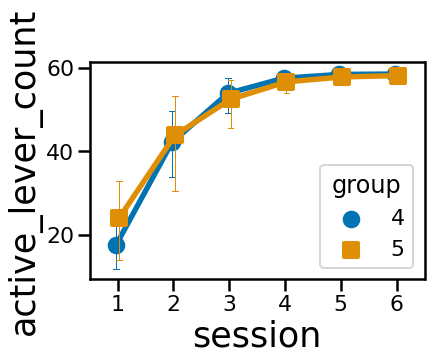

In [237]:
dv = 'active_lever_count'

#RM using Pingouin
aov = pg.mixed_anova(dv=dv, within='session', between='group', subject='animal', data=data_session_LPD_gb_16_wi)
pg.print_table(aov)

#posthocs
posthocs = pg.pairwise_ttests(dv=dv, within='session', between='group',
                              subject='animal', data=data_session_LPD_gb_16_wi, padjust='holm')
pg.print_table(posthocs)

sns.pointplot(data=data_session_LPD_gb_16_wi, x='session', y=dv, hue='group', dodge=True, markers=['o', 's'],
              capsize=.1, errwidth=1, palette='colorblind')

### BP

In [73]:
task_keep = ['LPDPRR1', 'LPDPRR3']
data_session_BP = data_session[data_session['task'].isin(task_keep)]
print(data_session_BP.shape)
data_session_BP.head()

(2205, 25)


,task,part,date,session,cage,animal,group,active_lever,trial_num,trial_bin,trial_duration,reinforcement_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_count,HE_latency_1st,HE_latency_IRT,active_lever_count,inactive_lever_count,active_lever_latency_1st,inactive_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_IRT,lever_ratio,round
1515,LPDPRR1,within,200226,1,SA162,837,5,left,0,0,9.83,1,9.83,NaN,0,NaN,NaN,1,0,9.82,NaN,NaN,NaN,1.0,r1
1516,LPDPRR1,within,200226,1,SA162,837,5,left,1,0,2.84,1,2.84,NaN,0,NaN,NaN,2,0,2.23,NaN,0.60,NaN,1.0,r1
1517,LPDPRR1,within,200226,1,SA162,837,5,left,2,0,8.97,1,8.97,NaN,0,NaN,NaN,2,0,7.90,NaN,1.06,NaN,1.0,r1
1518,LPDPRR1,within,200226,1,SA162,837,5,left,3,0,4.00,1,4.00,NaN,0,NaN,NaN,3,0,2.07,NaN,0.96,NaN,1.0,r1
1519,LPDPRR1,within,200226,1,SA162,837,5,left,4,0,5.41,1,5.41,NaN,0,NaN,NaN,4,0,1.53,NaN,1.29,NaN,1.0,r1


In [74]:
sum_params = ['reinforcement_count', 'HE_count', 'inactive_lever_count']

mean_params = ['reinforcement_latency_1st', 'reinforcement_latency_IRT',
               'HE_latency_1st', 'HE_latency_IRT', 
               'active_lever_latency_1st', 'active_lever_latency_IRT',
               'inactive_lever_latency_1st', 'inactive_lever_latency_IRT',
               'lever_ratio', 'trial_duration']

max_params = ['trial_num', 'active_lever_count']

In [75]:
merge_cols = ['round', 'task', 'part', 'session', 'date', 'cage', 'animal', 'group', 'active_lever']

data_session_BP_sum = data_session_BP.groupby(merge_cols)[sum_params].sum().reset_index()
data_session_BP_mean = data_session_BP.groupby(merge_cols)[mean_params].mean().reset_index()
data_session_BP_max = data_session_BP.groupby(merge_cols)[max_params].max().reset_index()

data_session_BP_gb = data_session_BP_sum.merge(data_session_BP_mean, on=merge_cols).merge(data_session_BP_max, on=merge_cols)

data_session_BP_gb['reward_efficiency'] = data_session_BP_gb['active_lever_count'] / (data_session_BP_gb['active_lever_count'] + data_session_BP_gb['inactive_lever_count'])
print(data_session_BP_gb.shape)
data_session_BP_gb.tail()

(136, 25)


,round,task,part,session,date,cage,animal,group,active_lever,reinforcement_count,HE_count,inactive_lever_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_latency_1st,HE_latency_IRT,active_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_1st,inactive_lever_latency_IRT,lever_ratio,trial_duration,trial_num,active_lever_count,reward_efficiency
131,r2,LPDPRR3,within,1,210403,SA328,1243,5,right,18,83,96,159.146111,NaN,44.267692,26.735895,23.488889,4.023016,75.621111,16.941380,0.923313,159.146111,17,350,0.784753
132,r2,LPDPRR3,within,1,210403,SA328,1244,5,right,17,125,98,183.603529,NaN,31.727000,21.911997,27.266471,1.954246,62.881429,17.800645,0.923169,183.603529,16,248,0.716763
133,r2,LPDPRR3,within,1,210403,SA330,1248,5,left,14,78,35,238.895714,NaN,26.924444,43.604519,46.601429,5.316877,104.834286,42.663877,0.928445,238.895714,13,89,0.717742
134,r2,LPDPRR3,within,1,210403,SA330,1249,5,left,18,150,89,169.617222,NaN,41.551538,21.140675,21.122778,5.663209,99.213077,11.646788,0.879373,169.617222,17,350,0.797267
135,r2,LPDPRR3,within,1,210403,SA330,1250,5,left,17,156,14,213.855294,NaN,45.927500,14.983792,37.272353,2.262591,253.406667,21.529444,0.954524,213.855294,16,248,0.946565


In [102]:
data_session_BP_gb_16 = data_session_BP_gb[data_session_BP_gb['animal'] > 900]
data_session_BP_gb_16_wi = data_session_BP_gb_16[data_session_BP_gb_16['part'] == 'within']
data_session_BP_gb_16_wi

,round,task,part,session,date,cage,animal,group,active_lever,reinforcement_count,HE_count,inactive_lever_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_latency_1st,HE_latency_IRT,active_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_1st,inactive_lever_latency_IRT,lever_ratio,trial_duration,trial_num,active_lever_count,reward_efficiency
85,r2,LPDPRR1,within,1,210401,SA320,1218,4,left,17,231,238,216.830000,NaN,9.304444,11.766062,3.340000,2.162851,22.611429,12.814799,0.908176,216.830000,16,248,0.510288
86,r2,LPDPRR1,within,1,210401,SA320,1219,4,left,16,535,365,188.488750,NaN,16.497500,6.581490,4.731875,2.851425,12.895333,4.954748,0.639684,188.488750,15,176,0.325323
87,r2,LPDPRR1,within,1,210401,SA322,1224,4,right,16,80,274,212.192500,NaN,70.592857,22.538499,2.715625,3.050037,16.183750,7.993938,0.816785,212.192500,15,176,0.391111
88,r2,LPDPRR1,within,1,210401,SA322,1225,4,right,19,67,314,176.751579,NaN,46.291000,42.588501,3.057368,1.458106,18.054615,7.457586,0.818172,176.751579,18,494,0.611386
89,r2,LPDPRR1,within,1,210401,SA322,1226,4,right,17,86,205,207.978824,NaN,74.542000,35.337408,3.738235,3.160562,34.689091,12.943926,0.819787,207.978824,16,248,0.547461
90,r2,LPDPRR1,within,1,210401,SA323,1227,4,left,17,70,182,194.105882,NaN,35.940000,37.826635,4.910588,1.968322,33.202500,12.983958,0.866332,194.105882,16,248,0.576744
91,r2,LPDPRR1,within,1,210401,SA323,1228,4,left,15,67,215,202.245333,NaN,27.882857,42.841169,5.868000,3.117975,9.604000,8.052733,0.765658,202.245333,14,125,0.367647
92,r2,LPDPRR1,within,1,210401,SA323,1229,4,left,15,197,278,238.612667,NaN,32.073333,13.366244,3.416000,3.855597,15.352222,11.203772,0.801245,238.612667,14,125,0.310174
93,r2,LPDPRR1,within,1,210401,SA324,1230,4,left,12,21,22,40.674167,NaN,7.302500,10.777500,4.155000,1.439490,7.268571,6.940889,0.876656,40.674167,11,45,0.671642
94,r2,LPDPRR1,within,1,210401,SA324,1231,4,left,16,86,167,224.161250,NaN,39.065000,35.352045,3.223125,2.303691,21.863750,11.866784,0.865139,224.161250,15,176,0.513120


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-2.029446,9.485029,two-sided,0.071398,"[-0.28, 0.01]",1.063944,1.546,0.500676


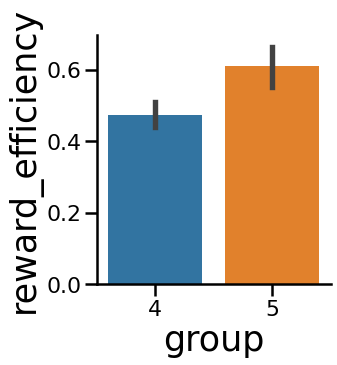

In [135]:
dv = 'reward_efficiency'

data_int = data_session_BP_gb_16_wi[data_session_BP_gb_16_wi['task']=='LPDPRR1']

sns.catplot(x='group', y=dv, data=data_int, kind='bar', ci=68)

g1=data_int[data_int['group'] == 4][dv]
g2=data_int[data_int['group'] == 5][dv]

ttest(g1, g2)

### LPD alternation

In [155]:
data_session_sg2 = pd.read_csv(file_paths[1])
data_session_sg2 = pd.DataFrame(data = data_session_sg2)
print(data_session_sg2.shape)
data_session_sg2.head()

(5106, 25)


,task,part,date,session,cage,animal,group,active_lever,switch,trial_num,trial_bin,trial_duration,reinforcement_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_count,HE_latency_1st,HE_latency_IRT,active_lever_count,inactive_lever_count,active_lever_latency_1st,inactive_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_IRT,lever_ratio
0,LPDS,within,210323,1,SA322,1224,4,right,orig,0,1,1.25,1,1.25,NaN,0,NaN,NaN,1,0,1.24,NaN,NaN,NaN,1.0
1,LPDS,within,210323,1,SA322,1224,4,right,orig,1,1,1.28,1,1.28,NaN,0,NaN,NaN,1,0,1.27,NaN,NaN,NaN,1.0
2,LPDS,within,210323,1,SA322,1224,4,right,orig,2,1,1.18,1,1.18,NaN,0,NaN,NaN,1,0,1.17,NaN,NaN,NaN,1.0
3,LPDS,within,210323,1,SA322,1224,4,right,orig,3,1,7.12,1,7.12,NaN,0,NaN,NaN,1,0,7.11,NaN,NaN,NaN,1.0
4,LPDS,within,210323,1,SA322,1224,4,right,orig,4,1,3.90,1,3.90,NaN,0,NaN,NaN,1,0,3.89,NaN,NaN,NaN,1.0


In [156]:
sum_params = ['reinforcement_count', 'HE_count', 'active_lever_count', 'inactive_lever_count']

max_params = ['trial_num']

mean_params = ['reinforcement_latency_1st', 'reinforcement_latency_IRT',
               'HE_latency_1st', 'HE_latency_IRT', 
               'active_lever_latency_1st', 'active_lever_latency_IRT',
               'inactive_lever_latency_1st', 'inactive_lever_latency_IRT',
               'lever_ratio', 'trial_duration']

In [157]:
merge_cols = ['task', 'part', 'switch', 'session', 'date', 'cage', 'animal', 'group', 'active_lever']

data_session_sg2_sum = data_session_sg2.groupby(merge_cols)[sum_params].sum().reset_index()
data_session_sg2_mean = data_session_sg2.groupby(merge_cols)[mean_params].mean().reset_index()
data_session_sg2_max = data_session_sg2.groupby(merge_cols)[max_params].max().reset_index()

data_session_sg2_sessiongb = data_session_sg2_sum.merge(data_session_sg2_mean, on=merge_cols).merge(data_session_sg2_max, on=merge_cols)

data_session_sg2_sessiongb['reward_efficiency'] = data_session_sg2_sessiongb['active_lever_count'] / (data_session_sg2_sessiongb['active_lever_count'] + data_session_sg2_sessiongb['inactive_lever_count'])

print(data_session_sg2_sessiongb.shape)
data_session_sg2_sessiongb.tail()

(204, 25)


,task,part,switch,session,date,cage,animal,group,active_lever,reinforcement_count,HE_count,active_lever_count,inactive_lever_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_latency_1st,HE_latency_IRT,active_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_1st,inactive_lever_latency_IRT,lever_ratio,trial_duration,trial_num,reward_efficiency
199,LPDS,within,switch,3,210325,SA328,1243,5,right,25,3,25,44,7.593600,NaN,7.7500,0.270,7.583600,NaN,1.781500,1.235333,0.472667,7.593600,49,0.362319
200,LPDS,within,switch,3,210325,SA328,1244,5,right,25,6,25,85,9.047200,NaN,2.6400,3.060,9.037200,NaN,3.924500,1.000171,0.411302,9.047200,49,0.227273
201,LPDS,within,switch,3,210325,SA330,1248,5,left,25,6,25,99,8.216400,NaN,3.3925,3.745,8.206400,NaN,3.283000,0.815607,0.649835,8.216400,49,0.201613
202,LPDS,within,switch,3,210325,SA330,1249,5,left,27,4,27,41,3.638519,NaN,4.0400,NaN,3.628519,NaN,1.800833,0.786250,0.674383,3.638519,56,0.397059
203,LPDS,within,switch,3,210325,SA330,1250,5,left,27,0,27,21,3.477407,NaN,NaN,NaN,3.467407,NaN,1.921000,1.101250,0.756173,3.477407,56,0.562500


In [179]:
data_session_sg2_sessiongb_a = data_session_sg2_sessiongb[data_session_sg2_sessiongb['animal'] != 1230]
#data_session_sg2_sessiongb_a = data_session_sg2_sessiongb[data_session_sg2_sessiongb['animal'] != 1248]

data_session_sg2_sessiongb_a_wi = data_session_sg2_sessiongb_a[data_session_sg2_sessiongb_a['part'] == 'within']
data_session_sg2_sessiongb_a_wi

,task,part,switch,session,date,cage,animal,group,active_lever,reinforcement_count,HE_count,active_lever_count,inactive_lever_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_latency_1st,HE_latency_IRT,active_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_1st,inactive_lever_latency_IRT,lever_ratio,trial_duration,trial_num,reward_efficiency
102,LPDS,within,orig,1,210323,SA320,1218,4,left,28,1,28,11,1.925000,NaN,3.850000,NaN,1.915000,NaN,1.044000,0.245833,0.882143,1.925000,52,0.717949
103,LPDS,within,orig,1,210323,SA320,1219,4,left,25,13,25,26,5.289200,NaN,4.266364,0.880000,5.279200,NaN,2.630000,2.050937,0.673333,5.289200,44,0.490196
104,LPDS,within,orig,1,210323,SA322,1224,4,right,24,5,24,12,4.977083,NaN,3.760000,2.505000,4.967083,NaN,1.220000,1.343750,0.878472,4.977083,43,0.666667
105,LPDS,within,orig,1,210323,SA322,1225,4,right,24,1,24,39,4.610417,NaN,5.280000,NaN,4.600417,NaN,2.917143,0.745578,0.760943,4.610417,43,0.380952
106,LPDS,within,orig,1,210323,SA322,1226,4,right,20,5,20,5,7.563000,NaN,2.285000,0.256667,7.553000,NaN,1.246667,0.745000,0.912500,7.563000,34,0.800000
107,LPDS,within,orig,1,210323,SA323,1227,4,left,20,1,20,12,20.877000,NaN,50.010000,NaN,20.867000,NaN,15.396667,17.295000,0.812500,20.877000,34,0.625000
108,LPDS,within,orig,1,210323,SA323,1228,4,left,25,3,25,2,2.723200,NaN,1.700000,0.900000,2.713200,NaN,0.485000,NaN,0.960000,2.723200,44,0.925926
109,LPDS,within,orig,1,210323,SA323,1229,4,left,25,5,25,15,3.863200,NaN,3.005000,0.150000,3.853200,NaN,2.120000,1.740667,0.836000,3.863200,44,0.625000
111,LPDS,within,orig,1,210323,SA324,1231,4,left,24,3,24,4,6.659167,NaN,2.643333,NaN,6.649167,NaN,3.637500,NaN,0.916667,6.659167,43,0.857143
112,LPDS,within,orig,1,210323,SA324,1232,4,left,25,5,25,9,2.084800,NaN,1.750000,0.370000,2.074800,NaN,0.590000,1.674286,0.944444,2.084800,44,0.735294


In [180]:
data_orig = data_session_sg2_sessiongb_a_wi[data_session_sg2_sessiongb_a_wi['switch']=='orig']
data_switch = data_session_sg2_sessiongb_a_wi[data_session_sg2_sessiongb_a_wi['switch']=='switch']


ANOVA SUMMARY

Source              SS    DF1    DF2        MS       F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  ---------  -----  -----  --------  ------  -------  -----------  -----  -------  ------------  ---------  ---------
group         1175.761      1     14  1175.761   4.085    0.063      nan      0.226  nan           nan        nan        nan
session      15151.543      2     28  7575.771  39.389    0.000        0.000  0.738    0.504         0.000      0.014      0.000
Interaction   1853.335      2     28   926.667   4.818    0.016      nan      0.256  nan           nan        nan        nan


POST HOC TESTS

Contrast         session      A    B  Paired    Parametric         T     dof  Tail         p-unc    p-corr  p-adjust         BF10    hedges
---------------  ---------  ---  ---  --------  ------------  ------  ------  ---------  -------  --------  ----------  ---------  --------
session          -            1    2  True      T

<AxesSubplot:xlabel='session', ylabel='trial_duration'>

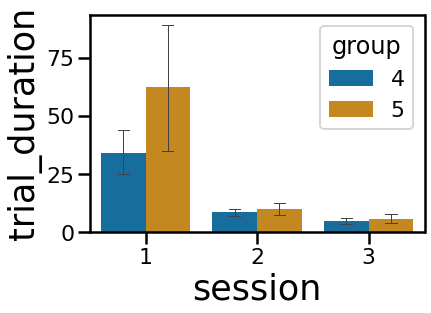

In [182]:
dv = 'trial_duration'
df = data_switch

#RM using Pingouin
aov = pg.mixed_anova(dv=dv, within='session', between='group', subject='animal', data=df)
pg.print_table(aov)

#posthocs
posthocs = pg.pairwise_ttests(dv=dv, within='session', between='group',
                              subject='animal', data=df, padjust='holm')
pg.print_table(posthocs)

sns.barplot(data=df, x='session', y=dv, hue='group', dodge=True,
              capsize=.1, errwidth=1, palette='colorblind')

### LPDE

In [183]:
data_session_LPDE = data_session[data_session['task'] == 'LPDE']
print(data_session_LPDE.shape)

(18473, 25)


In [ ]:
sum_params = ['reinforcement_count', 'HE_count', 'active_lever_count', 'inactive_lever_count']

max_params = ['trial_num']

mean_params = ['reinforcement_latency_1st', 'reinforcement_latency_IRT',
               'HE_latency_1st', 'HE_latency_IRT', 
               'active_lever_latency_1st', 'active_lever_latency_IRT',
               'inactive_lever_latency_1st', 'inactive_lever_latency_IRT',
               'lever_ratio', 'trial_duration']

In [203]:
merge_cols = ['round', 'task', 'part', 'session', 'date', 'cage', 'animal', 'group', 'active_lever']

data_session_LPDE_sum = data_session_LPDE.groupby(merge_cols)[sum_params].sum().reset_index()
data_session_LPDE_mean = data_session_LPDE.groupby(merge_cols)[mean_params].mean().reset_index()
data_session_LPDE_max = data_session_LPDE.groupby(merge_cols)[max_params].max().reset_index()

data_session_LPDE_gb = data_session_LPDE_sum.merge(data_session_LPDE_mean, on=merge_cols).merge(data_session_LPDE_max, on=merge_cols)

data_session_LPDE_gb['total_lp'] = (data_session_LPDE_gb['active_lever_count'] + data_session_LPDE_gb['inactive_lever_count'])
print(data_session_LPDE_gb.shape)
data_session_LPDE_gb.tail()

(442, 25)


,round,task,part,session,date,cage,animal,group,active_lever,reinforcement_count,HE_count,active_lever_count,inactive_lever_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_latency_1st,HE_latency_IRT,active_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_1st,inactive_lever_latency_IRT,lever_ratio,trial_duration,trial_num,total_lp
437,r2,LPDE,within,7,210415,SA328,1243,5,right,0,17,42,13,NaN,NaN,9.081667,2.988333,28.537381,NaN,55.827500,0.970556,0.931349,28.547381,41,55
438,r2,LPDE,within,7,210415,SA328,1244,5,right,0,19,27,16,NaN,NaN,19.916667,10.276250,76.688889,NaN,18.884000,4.697500,0.864198,76.698889,26,43
439,r2,LPDE,within,7,210415,SA330,1248,5,left,0,51,13,3,NaN,NaN,129.660000,33.629486,233.115385,NaN,34.203333,NaN,0.884615,233.125385,12,16
440,r2,LPDE,within,7,210415,SA330,1249,5,left,0,16,28,20,NaN,NaN,77.198571,0.491000,76.263571,NaN,26.545000,7.921806,0.807738,76.273571,27,48
441,r2,LPDE,within,7,210415,SA330,1250,5,left,0,80,17,29,NaN,NaN,106.163000,7.539016,167.025882,NaN,101.122500,7.672567,0.673109,167.035882,16,46


In [211]:
data_session_LPDE_gb_16 = data_session_LPDE_gb[data_session_LPDE_gb['session'] <8]
data_session_LPDE_gb_16_wi = data_session_LPDE_gb_16[data_session_LPDE_gb_16['part'] == 'within']
data_session_LPDE_gb_16_wi = data_session_LPDE_gb_16_wi[data_session_LPDE_gb_16_wi['animal'] > 900]
data_session_LPDE_gb_16_wi

,round,task,part,session,date,cage,animal,group,active_lever,reinforcement_count,HE_count,active_lever_count,inactive_lever_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_latency_1st,HE_latency_IRT,active_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_1st,inactive_lever_latency_IRT,lever_ratio,trial_duration,trial_num,total_lp
323,r2,LPDE,within,1,210406,SA320,1218,4,left,0,65,52,40,NaN,NaN,22.900000,0.925426,10.626923,NaN,17.173333,0.713524,0.874985,10.636923,51,92
324,r2,LPDE,within,1,210406,SA320,1219,4,left,0,51,54,64,NaN,NaN,8.210000,1.760785,8.640741,NaN,4.504444,2.585542,0.768474,8.650741,53,118
325,r2,LPDE,within,1,210406,SA322,1224,4,right,0,16,57,2,NaN,NaN,0.536667,3.397692,4.902982,NaN,3.210000,NaN,0.982456,4.912982,56,59
326,r2,LPDE,within,1,210406,SA322,1225,4,right,0,1,55,94,NaN,NaN,7.250000,NaN,7.147091,NaN,1.205000,1.132190,0.911176,7.157091,54,149
327,r2,LPDE,within,1,210406,SA322,1226,4,right,0,3,60,8,NaN,NaN,1.215000,1.850000,2.055000,NaN,8.043333,0.480000,0.964444,2.065000,59,68
328,r2,LPDE,within,1,210406,SA323,1227,4,left,0,45,56,18,NaN,NaN,6.345000,1.267472,6.008750,NaN,1.996000,0.338750,0.894345,6.018750,55,74
329,r2,LPDE,within,1,210406,SA323,1228,4,left,0,0,49,24,NaN,NaN,NaN,NaN,15.287959,NaN,20.722308,8.569286,0.847506,15.297959,48,73
330,r2,LPDE,within,1,210406,SA323,1229,4,left,0,4,60,24,NaN,NaN,1.360000,0.136667,1.897167,NaN,1.008000,0.400000,0.822222,1.907167,59,84
331,r2,LPDE,within,1,210406,SA324,1230,4,left,0,16,41,7,NaN,NaN,43.345000,1.500000,35.169268,NaN,15.847500,3.923333,0.943902,35.179268,40,48
332,r2,LPDE,within,1,210406,SA324,1231,4,left,0,8,45,23,NaN,NaN,1.920000,0.957500,21.719333,NaN,15.452500,0.932857,0.937897,21.729333,44,68



ANOVA SUMMARY

Source             SS    DF1    DF2        MS       F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  --------  -----  -----  --------  ------  -------  -----------  -----  -------  ------------  ---------  ---------
group         338.701      1     15   338.701   0.727    0.407      nan      0.046  nan           nan        nan        nan
session      9257.227      6     90  1542.871  44.170    0.000        0.000  0.746    0.410         0.000      0.029      0.000
Interaction    65.301      6     90    10.884   0.312    0.929      nan      0.020  nan           nan        nan        nan


POST HOC TESTS

Contrast         session      A    B  Paired    Parametric         T     dof  Tail         p-unc    p-corr  p-adjust           BF10    hedges
---------------  ---------  ---  ---  --------  ------------  ------  ------  ---------  -------  --------  ----------  -----------  --------
session          -            1    2  True      Tr

<AxesSubplot:xlabel='session', ylabel='active_lever_count'>

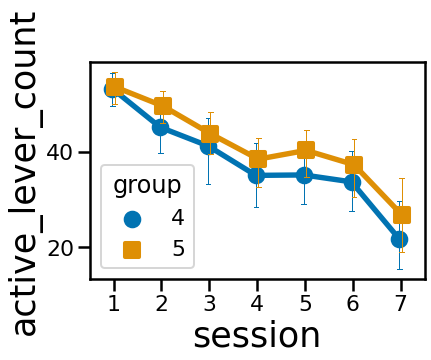

In [234]:
dv = 'active_lever_count'

#RM using Pingouin
aov = pg.mixed_anova(dv=dv, within='session', between='group', subject='animal', data=data_session_LPDE_gb_16_wi)
pg.print_table(aov)

#posthocs
posthocs = pg.pairwise_ttests(dv=dv, within='session', between='group',
                              subject='animal', data=data_session_LPDE_gb_16_wi, padjust='holm')
pg.print_table(posthocs)

sns.pointplot(data=data_session_LPDE_gb_16_wi, x='session', y=dv, hue='group', dodge=True, markers=['o', 's'],
              capsize=.1, errwidth=1, palette='colorblind')

### LPDR

In [213]:
reinst = ['LPDRC', 'LPDRDD', 'LPDRE']
data_session_LPDR = data_session[data_session['task'].isin(reinst)]
print(data_session_LPDR.shape)

(6388, 25)


In [214]:
sum_params = ['reinforcement_count', 'HE_count', 'active_lever_count', 'inactive_lever_count']

max_params = ['trial_num']

mean_params = ['reinforcement_latency_1st', 'reinforcement_latency_IRT',
               'HE_latency_1st', 'HE_latency_IRT', 
               'active_lever_latency_1st', 'active_lever_latency_IRT',
               'inactive_lever_latency_1st', 'inactive_lever_latency_IRT',
               'lever_ratio', 'trial_duration']

In [215]:
merge_cols = ['round', 'task', 'part', 'session', 'date', 'cage', 'animal', 'group', 'active_lever']

data_session_LPDR_sum = data_session_LPDR.groupby(merge_cols)[sum_params].sum().reset_index()
data_session_LPDR_mean = data_session_LPDR.groupby(merge_cols)[mean_params].mean().reset_index()
data_session_LPDR_max = data_session_LPDR.groupby(merge_cols)[max_params].max().reset_index()

data_session_LPDR_gb = data_session_LPDR_sum.merge(data_session_LPDR_mean, on=merge_cols).merge(data_session_LPDR_max, on=merge_cols)

data_session_LPDR_gb['total_lp'] = (data_session_LPDR_gb['active_lever_count'] + data_session_LPDR_gb['inactive_lever_count'])
print(data_session_LPDR_gb.shape)
data_session_LPDR_gb.tail()

(170, 25)


,round,task,part,session,date,cage,animal,group,active_lever,reinforcement_count,HE_count,active_lever_count,inactive_lever_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_latency_1st,HE_latency_IRT,active_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_1st,inactive_lever_latency_IRT,lever_ratio,trial_duration,trial_num,total_lp
165,r2,LPDRE,within,1,210419,SA328,1243,5,right,59,4,59,4,1.840508,NaN,4.615000,0.375000,1.830508,NaN,0.440,0.440000,0.986441,1.840508,58,63
166,r2,LPDRE,within,1,210419,SA328,1244,5,right,60,31,60,17,2.425833,NaN,2.193333,1.543333,2.415833,NaN,1.220,0.443333,0.962083,2.425833,59,77
167,r2,LPDRE,within,1,210419,SA330,1248,5,left,57,3,57,4,4.954912,NaN,10.405000,0.310000,4.944912,NaN,2.430,0.796667,0.985965,4.954912,56,61
168,r2,LPDRE,within,1,210419,SA330,1249,5,left,53,8,53,7,9.939057,NaN,3.540000,0.176667,9.929057,NaN,2.905,0.887500,0.954403,9.939057,52,60
169,r2,LPDRE,within,1,210419,SA330,1250,5,left,56,48,56,7,7.762857,NaN,4.921176,2.160769,7.752857,NaN,18.210,2.826667,0.984375,7.762857,55,63


In [216]:
data_session_LPDR_gb_a = data_session_LPDR_gb[data_session_LPDR_gb['animal'] > 900]
data_session_LPDR_gb_a_wi = data_session_LPDR_gb_a[data_session_LPDR_gb_a['part'] == 'within']
data_session_LPDR_gb_a_wi

,round,task,part,session,date,cage,animal,group,active_lever,reinforcement_count,HE_count,active_lever_count,inactive_lever_count,reinforcement_latency_1st,reinforcement_latency_IRT,HE_latency_1st,HE_latency_IRT,active_lever_latency_1st,active_lever_latency_IRT,inactive_lever_latency_1st,inactive_lever_latency_IRT,lever_ratio,trial_duration,trial_num,total_lp
85,r2,LPDRC,within,1,210414,SA320,1218,4,left,0,9,42,25,NaN,NaN,8.586667,22.032222,26.687143,NaN,9.168750,3.782333,0.870040,26.697143,41,67
86,r2,LPDRC,within,1,210414,SA320,1219,4,left,0,128,21,188,NaN,NaN,40.281875,12.594933,124.491905,NaN,36.793333,11.974568,0.406785,124.501905,20,209
87,r2,LPDRC,within,1,210414,SA322,1224,4,right,0,13,23,4,NaN,NaN,117.644000,3.743333,103.620000,NaN,38.370000,0.650000,0.942029,103.630000,22,27
88,r2,LPDRC,within,1,210414,SA322,1225,4,right,0,28,49,55,NaN,NaN,11.487778,0.480694,15.159388,NaN,12.234000,0.426310,0.914480,15.169388,48,104
89,r2,LPDRC,within,1,210414,SA322,1226,4,right,0,5,54,7,NaN,NaN,0.330000,0.290000,8.835000,NaN,3.295000,0.496667,0.957407,8.845000,53,61
90,r2,LPDRC,within,1,210414,SA323,1227,4,left,0,2,39,5,NaN,NaN,8.920000,36.460000,34.084615,NaN,17.240000,0.330000,0.955128,34.094615,38,44
91,r2,LPDRC,within,1,210414,SA323,1228,4,left,0,35,16,26,NaN,NaN,167.824286,1.496436,205.180000,NaN,105.024286,103.683763,0.689183,205.190000,15,42
92,r2,LPDRC,within,1,210414,SA323,1229,4,left,0,6,56,29,NaN,NaN,0.720000,0.276667,6.380357,NaN,8.240000,3.339955,0.880258,6.390357,55,85
93,r2,LPDRC,within,1,210414,SA324,1230,4,left,0,7,29,1,NaN,NaN,37.000000,0.320000,68.711034,NaN,46.980000,NaN,0.982759,68.721034,28,30
94,r2,LPDRC,within,1,210414,SA324,1231,4,left,0,10,39,6,NaN,NaN,34.050000,0.288889,36.107436,NaN,49.112000,1.410000,0.931624,36.117436,38,45


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.236551,12.951226,two-sided,0.816705,"[-3.99, 3.21]",0.110829,0.44,0.054817


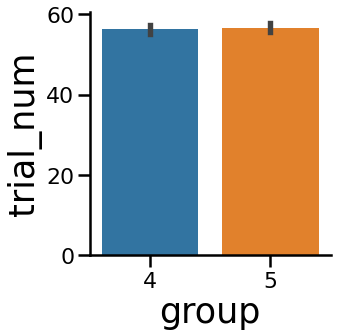

In [236]:
dv = 'trial_num'

data_int = data_session_LPDR_gb_a_wi[data_session_LPDR_gb_a_wi['task']=='LPDRE']

sns.catplot(x='group', y=dv, data=data_int, kind='bar', ci=68)

g1=data_int[data_int['group'] == 4][dv]
g2=data_int[data_int['group'] == 5][dv]

ttest(g1, g2)